# Введение в TensorFlow

![](https://lh3.googleusercontent.com/I1Dpp7I9RZIGl0rVMlPfnhfl-bkl_2uDHZwVC87BWmqtPaAs1irMWOdJxTmTEQJB-VGfLryCyHxqvyNchVIVLL-vqGrF3Q=s688)

Ох! Наконец-то пришло время поиграться с [tensorflow](https://www.tensorflow.org) и посмотреть как в нём обучать самые простые модельки.

Если у вас ещё нет tensorflow, самое время его установить: 

* `pip install tensorflow` для работы с CPU
* Если хотите работать на GPU, читайте лучшего друга человека, [документацию.](https://www.tensorflow.org/install/) Если вы хотите производить расчеты на GPU, то потребуется установить CUDA.

In [2]:
import numpy as np

In [2]:
import tensorflow as tf

Убедимся, что у нас всё установлено правильно

In [3]:
hello = tf.constant('Hello, TensorFlow!') # создаем объект из TF

# создаем сессию
with tf.Session( ) as sess:
    print(sess.run(hello)) #сессия "выполняет" объект

b'Hello, TensorFlow!'


In [4]:
hello  # если запросить объект без выполнения, покажется тензор

<tf.Tensor 'Const:0' shape=() dtype=string>

# 0. Tensoflow teaser

Давайте реализуем на `numpy` и на `tensorflow` функцию для поиска суммы квадратов первых $N$ чисел и посмотрим насколько быстро эти функции работают.

In [5]:
def sum_squares(N):
    # функция для подсчета сумм квадратов
    

In [6]:
%%timeit
sum_squares(10**8)

1.32 s ± 54.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# "Я обещаю вставить сюда N позже"
N = tf.placeholder('int64', name="input_to_your_function")

# задаём вычисление суммы
result = tf.reduce_sum((tf.range(N)**2))

In [8]:
%%timeit

# Дорогая сессия, вычисли мне результат пожалуйста! Вот тебе N.
with tf.Session( ) as sess:
    sess.run(result, {N: 10**8}) 

693 ms ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Если сравнивать время, то мы видим значительный прогресс в скорости вычислений даже для простой задачи. Данный прирост будет значительно большим для сложных и тяжелый по памяти рассчетов.

# 1. Основы основ

__TensorFlow__ —  в настоящий момент это самый популярный фреймворк для решения задач машинного обучения и создания нейронных сетей. Бэкенд продукта основан на C++, однако для управления обычно используется Python (также существует замечательная библиотека TensorFlow для R). 

TensorFlow использует концепцию графического представления вычислительных задач. Такой подход позволяет пользователям определять математические операции в качестве элементов графов данных, переменных и операторов. Поскольку нейронные сети, по сути, и являются графами данных и математических операций, TensorFlow отлично подходит для работы с ними и машинного обучени

В `tensorflow` существует 2 глобально отличающиеся друг от друга парадигмы:

* __placeholder__ — место в графе, которое может принимать входные параметры в граф извне. В эти места мы будем вставлять наши данные
* __transformation__ — все остальное (все операции, константы, вектора, матрицы), которые расчитываются внутри нашего графа

Посмотрим как это все работает на примерах. Работа с билиотекой строится вокруг построения и выполнения **графа вычислений**. Обычно в tensorflow сначала создают струкртуру для вычислений, а после выполняют её. Вычислительные графы выполняются в сессиях.

## 1.1 Граф вычислений 

Основной объект в tensorflow - это **тензор.** Или многомрный массив чисел.  Давайте попробуем создать тензор, заполненный нулями. 

In [9]:
np.zeros([3,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:
zeros_tensor = tf.zeros([3, 3])
zeros_tensor

<tf.Tensor 'zeros:0' shape=(3, 3) dtype=float32>

Чтобы увидеть значение тензора, его нужно выполнить. До выполнения это всего лишь вычислительный граф. Не более того. 

In [4]:
sess = tf.InteractiveSession( )
zeros_tensor.eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

Над тензорами можно совершать разнообразные операции.В примере ниже мы используем конструкцию `sess.run` — это метод исполнения операций графа в сессии. 

В первой строчке я создал тензор из усеченного нормального распределения. Для него используется стандартная генерация нормального распределения, но из него исключается всё, что выпадает за пределы двух стандартных отклонений. Помимо этого генератора есть равномерное, простое нормальное, гамма и еще несколько других распределений. 

Второй тензор — это заполненный значением 0.5 многомерный массив размера 2х2 и это что-то похожее на numpy и его функции создания многомерных массивов.

In [12]:
a = tf.truncated_normal([2, 2])
b = tf.fill([2, 2], 0.5)

print(sess.run(a + b))
print(sess.run(a - b))
print(sess.run(a * b))
print(sess.run(tf.matmul(a, b)))

[[ 1.3051288  -0.6828134 ]
 [ 2.1072333   0.13929367]]
[[-1.7588563   0.41868323]
 [-0.95731044 -0.2607178 ]]
[[-0.92924523  0.20148517]
 [-0.02660546  0.38983828]]
[[ 0.17091927  0.17091927]
 [-0.6674156  -0.6674156 ]]


In [13]:
c = a + b
c.eval()

array([[-1.0163227 ,  1.0901852 ],
       [ 0.44974312,  0.12131757]], dtype=float32)

Следущий важный объект в tensorflow это **переменная.** Она представляет из некоторый буфер в памяти, который содержит текущие тензоры. 

* Переменную можно вставить в любое место графа 
* Переменные можно использовать, чтобы описать какую-то трансформацию
* В процессе расчётов их можно изменять
* Обычно их исползуют для описания параметров модели

In [14]:
v = tf.Variable(zeros_tensor)
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32_ref>

Переменная участвует в вычислениях в качестве узла вычислительного графа, сохраняет состояние, и ей нужна какая-нибудь инициализация. Так, если в следующем примере обойтись без первой строчки, то TF выкинет исключение.

In [15]:
v.eval()

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

In [16]:
sess.run(v.initializer)
v.eval()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

Последний важный объект tensorflow это **плейсхолдеры.**

* Плэйсхолдер — это обещание подставить какое-то значение потом
* Обычно их используют в тех местах, куда позже подставят реальные данные

Плейсхолдерам и переменным, кстати говоря, можно давать имена.

In [17]:
x = tf.placeholder('float32', name = 'Jack')
f =  1 + 2 * x + tf.pow(x, 2)

sess.run(f, feed_dict={x: 20})

441.0

In [18]:
#Стандартный placeholder который может содержать float32 скаляр, вектор, матрицу.
arbitrary_input = tf.placeholder('float32')

#Входящий вектор, который может иметь произвольный размер
input_vector = tf.placeholder('float32',shape=(None,))

#Входящий вектор длины 10 с переменными типа int
fixed_vector = tf.placeholder('int32',shape=(10,))

#Матрица с произвольным количеством строк и 15ью столбцами
input_matrix = tf.placeholder('float32',shape=(None,15))

#Если очень надо можем задавать любые произвольные размерности
input1 = tf.placeholder('float64',shape=(None,100,None))
input2 = tf.placeholder('int32',shape=(None,None,3,224,224))

In [ ]:
#векторное умножение
double_the_vector = input_vector*2

#Взятие синуса
elementwise_cosine = tf.cos(input_vector)

#разница между квадратом вектора и самим вектором
vector_squares = input_vector**2 - input_vector

In [ ]:
#Практика:
#Создать 2 вектора с типом переменных float32
my_vector = #<student.init_float32_vector()>
my_vector2 = #<student.init_float32_vector()>

In [ ]:
# Напишите функция производящие следующие трансформации:
#(vec1)*(vec2) / (sin(vec1) +1)
my_transformation = #<student.implementwhatwaswrittenabove()>

In [4]:
# Ещё немного о переменных

#Создадим вектор с первоначальными значениями 1 длины 5
shared_vector_1 = tf.Variable(initial_value=np.ones(5))

In [10]:
#Проинициализируем все переменные
sess.run(tf.global_variables_initializer())

#Запустим наш вектор ( не рассчитывая весь граф)
print ("initial value", sess.run(shared_vector_1))

initial value [1. 1. 1. 1. 1.]


In [11]:
#Зададим новое значение
sess.run(shared_vector_1.assign( np.arange(5) ))
print ("new value", sess.run(shared_vector_1))

new value [0. 1. 2. 3. 4.]


Итак, в этой части тетрадки мы познакомились с такими объектами tensorflow, как 

* граф вычислений 
* тензор 
* переменная
* заглушка 

Давайте закрепим это и выполним небольшое задание. А именно, попробуем реализовать среднюю квадратичную ошибку и сигмоиду.

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [ ]:
## Ваш код для сигмоиды
# Функция принимает на вход скаляр и отдает скаляр 




In [21]:
sigma

<tf.Tensor 'truediv:0' shape=<unknown> dtype=float32>

In [22]:
sigma.eval(feed_dict={x: np.linspace(-1, 1, 10)})

array([0.26894143, 0.314799  , 0.36457646, 0.41742977, 0.4722508 ,
       0.52774924, 0.5825702 , 0.6354236 , 0.685201  , 0.7310586 ],
      dtype=float32)

Скорее всего, по ходу рассказа вы заметили некоторые параллели с `numpy`. Это правда, они есть. Практически все функции и методы numpy так или иначе есть в tensorflow. Например: 

```
np.zeros -> tf.zeros
np.sin -> tf.sin
np.mean -> tf.reduce_mean
np.arange -> tf.range
np.cumsum -> tf.cumsum
```

Тоже самое верно и для [многих других функций.](https://www.tensorflow.org/api_docs/python/)

$$ MSE(\hat y, y) = \sum_{i=1}^n (\hat y - y)^2 $$

In [ ]:
## Ваш код для MSE 
# Функция принимает на вход 2 вектора и отдает 1 скаляр 



compute_mse = lambda vector1, vector2: #<how to run you graph?>

In [24]:
mse.eval({y_true: [1,2,3,4,5], y_predicted: [5,4,3,2,1]})

8.0

In [7]:
# работающий вариант
import numpy as np
y_true = tf.placeholder("float32", shape=(None,), name="y_true")
y_predicted = tf.placeholder("float32", shape=(None,), name="y_predicted")

mse = tf.reduce_mean((y_true - y_predicted)**2)

compute_mse = lambda vector1, vector2: mse.eval({y_true: vector1, y_predicted: vector2})
mse.eval({y_true: [1,2,3,4,5], y_predicted: [5,4,3,2,1]})

8.0

In [8]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10**3]:
    
    elems = [np.arange(n), np.arange(n,0,-1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Wrong result:')
                print('mse(%s,%s)'%(el, el_2))
                print("should be: %f, but your function returned %f"%(true_mse, my_mse))
                raise(ValueError, "Что-то не так")

print("All tests passed")

All tests passed


In [9]:
# вариант, который выдавал ошибку
# единично срабатывал, а в лямбда функции нет

vector1 = tf.placeholder("float32", shape=(None,), name="y_true")
vector2 = tf.placeholder("float32", shape=(None,), name="y_predicted")

mse = tf.reduce_mean((vector1 - vector2)**2)

compute_mse = lambda vector1, vector2: mse.eval({vector1: vector1, vector2: vector2})
mse.eval({vector1: [1,2,3,4,5], vector2: [5,4,3,2,1]})

8.0

In [10]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10**3]:
    
    elems = [np.arange(n), np.arange(n,0,-1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Wrong result:')
                print('mse(%s,%s)'%(el, el_2))
                print("should be: %f, but your function returned %f"%(true_mse, my_mse))
                raise(ValueError, "Что-то не так")

print("All tests passed")

TypeError: unhashable type: 'numpy.ndarray'

Ошибка в сопадении имен в лямбда функции и в параметрах, вставки. Надо чтобы имена вставки не совдали с именами в лямбда функции.

In [11]:
# будет работать

vector1_1 = tf.placeholder("float32", shape=(None,), name="y_true")
vector2_1 = tf.placeholder("float32", shape=(None,), name="y_predicted")

mse = tf.reduce_mean((vector1_1 - vector2_1)**2)

compute_mse = lambda vector1, vector2: mse.eval({vector1_1: vector1, vector2_1: vector2})
mse.eval({vector1_1: [1,2,3,4,5], vector2_1: [5,4,3,2,1]})

8.0

In [12]:
# Tests
from sklearn.metrics import mean_squared_error

for n in [1, 5, 10, 10**3]:
    
    elems = [np.arange(n), np.arange(n,0,-1), np.zeros(n),
             np.ones(n), np.random.random(n), np.random.randint(100, size=n)]
    
    for el in elems:
        for el_2 in elems:
            true_mse = np.array(mean_squared_error(el, el_2))
            my_mse = compute_mse(el, el_2)
            if not np.allclose(true_mse, my_mse):
                print('Wrong result:')
                print('mse(%s,%s)'%(el, el_2))
                print("should be: %f, but your function returned %f"%(true_mse, my_mse))
                raise(ValueError, "Что-то не так")

print("All tests passed")

All tests passed


## 1.2 Производные да градиенты

Тензорфлоу может вычислять производные и градиенты автоматически. Градиенты вычисляютя по цепному правилу: 

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Пакет может получить производную любого графа, заданного в нём.

In [26]:
my_scalar = tf.placeholder('float32')

scalar_squared = my_scalar**2

# производная scalar_squared по my_scalar
derivative = tf.gradients(scalar_squared, [my_scalar, ])

In [27]:
derivative

[<tf.Tensor 'gradients/pow_2_grad/Reshape:0' shape=<unknown> dtype=float32>]

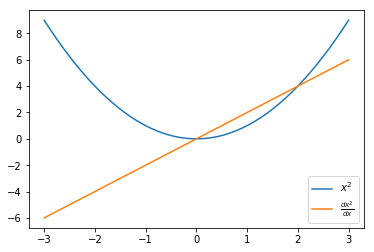

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

with tf.Session( ) as sess:
    x = np.linspace(-3, 3)
    x_squared, x_squared_der = sess.run([scalar_squared, derivative[0]],
                                     {my_scalar:x})

plt.plot(x, x_squared,label="$x^2$")
plt.plot(x, x_squared_der, label=r"$\frac{dx^2}{dx}$")
plt.legend();

Почему это круто? 

In [29]:
# ВНИМАНИЕ! НИ В КОЕМ СЛУЧАЕ НЕ ПЫТАЙТЕСЬ ПОНЯТЬ ЭТОТ КОД! 

my_vector = tf.placeholder('float32', [None])

# Найдём производную следующей дичи по my_scalar и my_vector
weird_psychotic_function = tf.reduce_mean(
    (my_vector+my_scalar)**(1+tf.nn.moments(my_vector,[0])[1]) + 
    1./ tf.atan(my_scalar))/(my_scalar**2 + 1) + 0.01*tf.sin(
    2*my_scalar**1.5)*(tf.reduce_sum(my_vector)* my_scalar**2
                      )*tf.exp((my_scalar-4)**2)/(
    1+tf.exp((my_scalar-4)**2))*(1.-(tf.exp(-(my_scalar-4)**2)
                                    )/(1+tf.exp(-(my_scalar-4)**2)))**2

der_by_scalar = # пишем сами производную для скалара
der_by_vector = # пишем сами производную для вектора (почему от двух переменныз производную?)

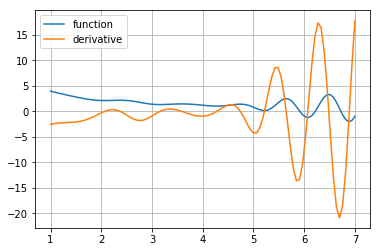

In [30]:
scalar_space = np.linspace(1, 7, 100)

with tf.Session( ) as sess:
    y = [sess.run(weird_psychotic_function, {my_scalar:x, my_vector:[1, 2, 3]})
         for x in scalar_space]

    y_der_by_scalar = [sess.run(der_by_scalar,
                             {my_scalar:x, my_vector:[1, 2, 3]})
                       for x in scalar_space]

plt.plot(scalar_space, y, label='function')

plt.plot(scalar_space, y_der_by_scalar, label='derivative')
plt.grid()
plt.legend();

## 1.3 Оптимизация

Итак, tf умеет искать производные, осталось научиться применять его для оптимизации. 

In [31]:
y_guess = tf.Variable(np.zeros(2,dtype='float32'))
y_true = tf.range(1,3,dtype='float32')

loss = tf.reduce_mean((y_guess - y_true + tf.random_normal([2]))**2) 

optimizer = tf.train.AdamOptimizer(0.05,0.9).minimize(loss,var_list=[y_guess])

#Тоже самое, но разбитое на шаги:
#opt = tf.train.AdamOptimizer(0.05,0.9)
#updates = opt.compute_gradients(loss, [y_guess])
#optimizer = opt.apply_gradients(updates)

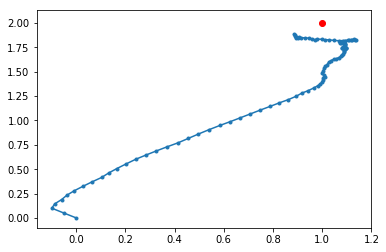

In [33]:
from IPython.display import clear_output
# можно поиграться с различными методами оптимизации =)

s = tf.InteractiveSession()                 # запускаем сессию для вычислений 
s.run(tf.global_variables_initializer())    # инициализируем переменные 

guesses = [s.run(y_guess)]

for _ in range(100):
    s.run(optimizer)
    guesses.append(s.run(y_guess))
    
    clear_output(True)
    plt.plot(*zip(*guesses),marker='.')
    plt.scatter(*s.run(y_true),c='red')
    plt.show()

# 2. Собираем логистическую регрессию

Пришло время собрать все наши знания в единое целое и собрать свою логистическую регрессию.

* Веса будем создавать как переменные, модель будет помнить их внутри себя
* Данные будем задавать как плэйсхолдеры, а потом по мере оптимизации подставлять 
* Ещё нам понадобится функция потерь (кросс-энтропия подойдёт)
* А ещё нужно будет написать цикл для тренировки модели, который будет загонять вместо плэйсхолдеров новые батчи из наблюдений и делать новые шаги градиентного спуска

Напишем небольшую функцию для динамической визуализации обучения.

In [34]:
from IPython import display

def visualize(l1,l2, h1, h2):
    plt.figure(figsize=(20,5)) 
    epo_range = range(1,len(h1)+1)
    tick_range = range(1,len(h1)+1,2)
    plt.subplot(1,2,1)
    plt.title('Learning loss')
    plt.plot(epo_range,l1, label='train set')
    plt.plot(epo_range,l2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.legend(title = 'Loss at:')
    
    plt.subplot(1,2,2)
    plt.title('Learning accuracy')
    plt.plot(epo_range,h1, label='train set')
    plt.plot(epo_range,h2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.ylim(0, 1.)
    plt.legend(title = 'Accuracy at:')
    
    display.clear_output(wait=True)
    plt.show()

Подгрузим датасет. Будем обучать нашу логистическую регрессию на классическом [MNIST.](http://yann.lecun.com/exdb/mnist/) Это классический датасет из картинок с рукописными цифрами с очень богатой историей. Долгое время он был стандартом для тестирование различных новых архитектур, пока не уступил место более богатым и сложным датасетам.  

In [35]:
import keras # внутри keras уже есть набор данных, подгрузим его 

def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # нормализация матриц
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # последние 10000 примеров из трэйна оставим для валидации
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    
    # сделаем OHE для таргета
    y_train = keras.utils.to_categorical(y_train)
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    y_test = keras.utils.to_categorical(y_test)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

Using TensorFlow backend.


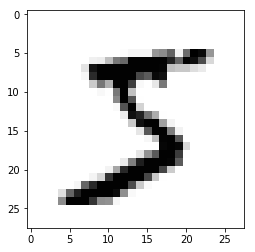

In [36]:
plt.imshow(X_train[0], cmap="Greys");

In [37]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
X_train.shape

(50000, 28, 28)

In [39]:
# Делаем решэйп наших матриц в вектора

X_train = X_train.reshape(X_train.shape[0],28**2)
X_val = X_val.reshape(X_val.shape[0],28**2)
X_test = X_test.reshape(X_test.shape[0],28**2)
X_train.shape

(50000, 784)

Собираем граф под логистическую регрессию.

In [40]:
# для удобства размерность каждого входа 
order = X_train.shape[1] 

# создаём две заглушки для входных данных 
input_X = tf.placeholder(name='input', shape=[None, order], dtype = tf.float32)
input_y = tf.placeholder(name='output', shape=[None, 10], dtype = tf.float32) # 0-9 цифры => 10 classes

# создаем переменные, которые мы будем обновлять на каждой итерации в ходе обучения
W = tf.Variable(tf.random_normal([order, 10]), name ='weights')
b = tf.Variable(tf.zeros([10]), name = 'constant')

# прогнозы будут собираться в результате применения softmax 
pred = tf.nn.softmax(tf.matmul(input_X, W) + b) 

# потери будем считать по logloss
loss = tf.reduce_mean(-tf.reduce_sum(input_y*tf.log(pred), reduction_indices=1)) 

# будем на каждой итерации подсчитывать accuracy 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# в качестве оптимизатора возьмём momentum (для разнообразия, а то adam да adam)
optimizer = tf.train.MomentumOptimizer(0.1, 0.5).minimize(loss, var_list=[W, b])


Теперь давайте чуть подробнее посмотрим что делает код выше.

1. Мы объявили placeholder для переменных X и y. На этом этапе уже нужно задать им размерность.
2. Мы инициализировали переменные W и b. Это переменные tensorflow, которые пока никаких значений не имеют, но будут инициализированы стандартным нормальным распределением для W и нулём для b.
3. Задаём суть модели, а именно функцию ошибок. Обратите внимание на функцию `reduce_sum`: на входе она всего лишь подсчитывает сумму матрицы по строчкам, но пользоваться надо именно ею, а не обычной суммой или соотвествующими функциями из numpy, потому что TensorFlow сможет куда более эффективно оптимизировать процесс вычислений. 
4. Вводим переменную `optimizer` - оптимизатор, то есть собственно алгоритм, который будет подсчитывать градиенты и обновлять веса. 

Теперь запишем большой цикл, который будет осуществлять обновления весов. То есть как раз вычислять переменную `optimizer`. На каждой итерации цикла мы берём случайное подмножество из `batch_size` элементов и подсчитываем значения нужных переменных. Мы подаём в функцию `sess.run` список переменных, которые нужно подсчитать и словарь `feed_dict`, в который записываем значения входных переменных, обозначенных ранее как `tf.placeholder`. 

Остался только этап для обучения модели. Напишем функцию, которая будет генерировать из наших данных батчи. Одна эпоха - один проход модели по всем батчам. Один батч - совокупность наблюдений. 

In [41]:
def batches_generator(X, y, batch_size):
    n_batches = int(X.shape[0]/batch_size) + 1
    for batch_idx in range(n_batches):
        indices = (batch_idx*batch_size, min(X.shape[0], (batch_idx+1)*batch_size))
        yield X[indices[0]:indices[1]], y[indices[0]:indices[1]]

Теперь задаём процесс обучения.

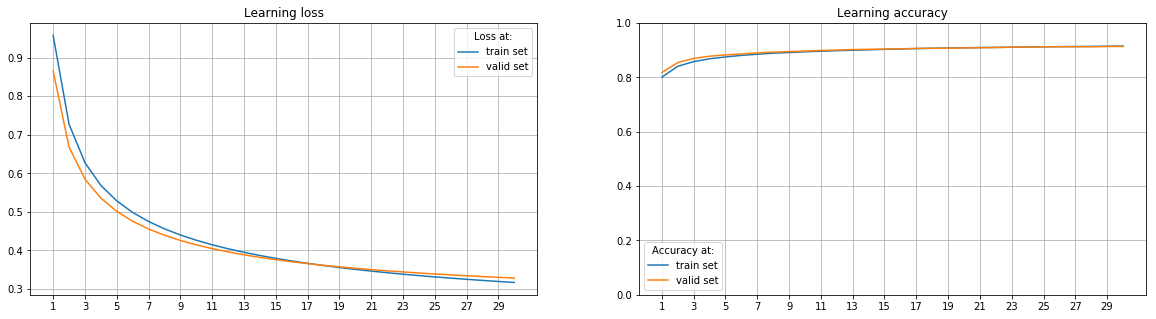

In [45]:
np.random.seed(42)   # для воспроизводимости

n_epochs = 30        # число эпох для обучения 
batch_size = 100     # размер одного батча 

s = tf.InteractiveSession()                 # запускаем сессию для вычислений 
s.run(tf.global_variables_initializer())    # инициализируем переменные 

# будем писать значения метрик в вектора 
loss_test, loss_train  = [ ], [ ] 
acc_test, acc_train = [ ], [ ]

for i in range(n_epochs):
    # дробин на этой эпохе данные на батчи 
    num_batches = (X_train.shape[0] / batch_size) + 1
    
    # сгенерировали батчи 
    batch_gen = batches_generator(X_train, y_train, batch_size)
    
    # пошёл цикл по батчам 
    for X_batch, y_batch in batch_gen:
        # итерация градиентного спуска на текущем батче 
        s.run(optimizer, {input_X: X_batch, input_y: y_batch})
    
    # посмотрим на качество модели на трэйне и валидации
    loss_train.append(s.run(loss, {input_X: X_train, input_y: y_train}))
    loss_test.append(s.run(loss, {input_X: X_val, input_y: y_val}))
    
    acc_train.append(s.run(accuracy, {input_X: X_train, input_y: y_train}))
    acc_test.append(s.run(accuracy, {input_X: X_val, input_y: y_val}))
    
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 

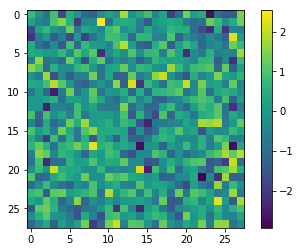

In [46]:
# Можно посмотреть на значения весов для каждой из категорий, если очень хочется
plt.imshow(s.run(W)[:,0].reshape(28,28))
plt.colorbar()

Обратите внимание, что TensorFlow очень чуствительна к размерностям. Например, чтобы работала функция `matmul`, нужно подать ей на вход обязательно матрицы. Даже если это матрица размера $1 \times 1$.

Также обратите внимание, что вместо `with tf.Session() as sess` можно писать `sess = InteractiveSession()` и пользоваться переменной sess как постоянной открытой сессией.

Посмотрим на тестовой выборке, насколько хорошо нам удалось обучить модель.

In [47]:
print("Точность: %s" %s.run(accuracy, {input_X: X_test, input_y: y_test}))

Точность: 0.9065


# 3. Наша первая нейронная сеть на TensorFlow

Пришло время страдать. Чтобы пострадать как следует, вы получаете задание - построить свою первую нейросеть в tensorflow. Спойлер: cильнее вего вы будете страдать от того, что размерности между слоями не сходятся. Осторожнее с этим. 

Обратите внимание, что здесь не требуется создавать $228$-слойных монстров. Два слоя вполне достаточно. Такая сетка уже будет иметь преимущество над логистической регрессией. Если вам удастся победить логрегрессию, а энтузиазм ещё не исчерпан, попробуйте улучшить качество сетки до максимума. Не успокаивайтесь, пока не побьёте на тесте прекрасные $98.5%$.

Если с заданием возникают непреодалимые сложности, прочитайте в Николенко разделы $2.6$ и $3.6$. Сразу после этого станет слишком легко.

In [ ]:
import keras # внутри keras уже есть набор данных, подгрузим его 
# дубль функции выше, чтобы было удобнее
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # нормализация матриц
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    # последние 10000 примеров из трэйна оставим для валидации
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    
    # сделаем OHE для таргета
    y_train = keras.utils.to_categorical(y_train)
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    y_test = keras.utils.to_categorical(y_test)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

In [ ]:
# наши данные
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
# Делаем решэйп наших матриц в вектора

X_train = X_train.reshape(X_train.shape[0],28**2)
X_val = X_val.reshape(X_val.shape[0],28**2)
X_test = X_test.reshape(X_test.shape[0],28**2)
X_train.shape

In [48]:
# Ваш выстраданный кодище

# Попробуйте переделать код логрегрессии в код двухслойного перцептрона
# используем оптимизатор adam
# можно еще добавить dropout
# примеры слоев
# nn = tf.layers.dense(input_X, 400, activation=tf.nn.elu) # 1ый слой 
# nn = tf.layers.dense(nn, 175, activation=tf.nn.elu) # 2 слой 



# 4. Можно придумывать свои собственные слои!

Но... Но... Но... Намного проще собрать это в Keras! Зачем нам страдать? 

Дело в том, что Keras лишь надстройка над tensorflow. По факту все слои, написанные для Keras это замаскированный tensorflow. Мы даже можем написать свой собственный keras, если нам очень сильно захочется. Например, вот так можно описать полносвязный слой с relu-активацией и softmax.

In [49]:
# полносвязный слой с relu активацией 
def fullyconnected_layer(x, input_size, out_size):
    W = tf.Variable(tf.truncated_normal([input_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.nn.relu(tf.matmul(x,W) + b)


# softmax-слой 
def softmax_layer(x, input_size, out_size):
    W = tf.Variable(tf.truncated_normal([input_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    return tf.nn.softmax(tf.matmul(x,W) + b)

Болеее того, на tensorflow можно попытаться реализовать какие-то свои слои, если очень сильно хочется. Современные архитектуры часто используют tensorflow как склейку между несколькими сетками, сделанными в keras. Чуть позже мы посмотрим на то как именно это делается. А пока что ещё одно дополнительное задание: 

Помните мы говорили о том, что в сетках можно делать батч-нормализацию, и что это ускоряет сходимость. Попробуйте подобно двум функциям выше реализовать свой `batchnorm_layer` и провести эксперимент: обучить одну сетку с использованием батч-нормализации, а вторую без. Сравните какая из сеток учится быстрее. Если будет туго, ответы ищите в Николенко в разделе $4.3$. 

In [50]:
# Ещё больше вашего адового кодища.

## Почиташки

* [Туториал с Хабра.](https://habrahabr.ru/company/ods/blog/324898/) Из него я украл начало этой тетрадки.
* [Туториал из ШАДовского курса.](https://nbviewer.jupyter.org/github/yandexdataschool/Practical_DL/blob/fall18/week02_autodiff/seminar_tensorflow.ipynb) Он же туториал из AML курса и из кучи других курсов. Из него я тоже много воровал для первой части тетрадки. Даже больше, чем с Хабра. Не подавайте на меня в суд. Я блюду авторское право. 